In [1]:
import keras
from keras.datasets import mnist
from keras import backend
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
learn_rate = 0.005 # learning rate on backward propagation
batch_size = 40 # batch size
epochs = 20# number of re-runs of each batch
arr = [] # to store the accuracy change over each epoch

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # load MNIST dataset into training and test sets.

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28*28) # data reshape before normalization
y_train = keras.utils.to_categorical(y_train, 10) #convert to categorical data instead of numerical data

In [0]:
x_test = x_test.reshape(x_test.shape[0],28*28) # data reshape before normalization
temp = y_test # saving original y values for final check
y_test = keras.utils.to_categorical(y_test,10) # convert to categorical data instead of numerical data

In [0]:
x_train = x_train.astype('float32') # Define as float32 type
x_test = x_test.astype('float32') # Define as float32 type
x_train = x_train / 255 # normalization
x_test = x_test / 255 # normalization

In [0]:
#  Softmax algorithm
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis = 0, keepdims= True) 

In [0]:
# Input layer with activation function for training the model
def forward_prop(w,b,x):
  return softmax(np.dot(w,np.transpose(x)) + b)

In [0]:
# backward propagation for training the model
def train(x_train, y_train, z, w, b):
  diff_l = z - np.transpose(y_train)
  diff_w = np.dot(diff_l, x_train)
  diff_b = np.sum(diff_l, axis = 1, keepdims= True)
  w -= learn_rate * diff_w
  b -= learn_rate * diff_b
  return w,b  

In [10]:
# initialization of random weights and bias values.
np.random.seed(1) # same seed for random functions used so keep the the pseudo random numbers similar. 
w = np.random.randn(10,784) * 0.01
b = np.random.randn(10,1)
for i in range(epochs):
  for j in range(0,len(x_train),batch_size):
    z = forward_prop(w,b,x_train[j : j + batch_size]) # Forward propagation for training the model
    w, b = train(x_train[j : j + batch_size], y_train[j : j + batch_size], z, w, b)
  z = np.transpose(forward_prop(w,b,x_test))
  li = []
  for n in range(10000):
    li.append(np.argmax(z[n]))
  counter = 0
  for m in range(10000):
    if li[m] == temp[m]:
      counter = counter + 1
  print('Epoch: ', i + 1)
  print('Accuracy: ', counter * 0.01)
  arr.append(counter * 0.01)

Epoch:  1
Accuracy:  90.93
Epoch:  2
Accuracy:  91.2
Epoch:  3
Accuracy:  91.39
Epoch:  4
Accuracy:  91.46000000000001
Epoch:  5
Accuracy:  91.57000000000001
Epoch:  6
Accuracy:  91.57000000000001
Epoch:  7
Accuracy:  91.62
Epoch:  8
Accuracy:  91.63
Epoch:  9
Accuracy:  91.63
Epoch:  10
Accuracy:  91.68
Epoch:  11
Accuracy:  91.7
Epoch:  12
Accuracy:  91.76
Epoch:  13
Accuracy:  91.76
Epoch:  14
Accuracy:  91.77
Epoch:  15
Accuracy:  91.81
Epoch:  16
Accuracy:  91.86
Epoch:  17
Accuracy:  91.88
Epoch:  18
Accuracy:  91.87
Epoch:  19
Accuracy:  91.89
Epoch:  20
Accuracy:  91.91


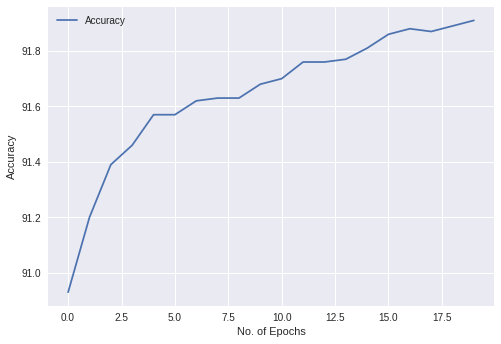

In [11]:
# Plotting the graph to visualize increase in accuracy of the model over the epochs
plt.plot(arr, label= 'Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.show()